In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import inspect
currentdir = os.path.dirname(os.path.abspath(
    inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
os.sys.path.insert(1, parentdir+'/src')
import torch
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
import time

In [3]:
import gym
import stage.envs
from stage.tasks.kuka import KukaPETS
from stage.utils.nn import use_gpu

In [4]:
savepath = parentdir + '/data/kuka/'

In [88]:
x = np.arange(-10, 0,0.01)
y = np.exp(-0.5*x)

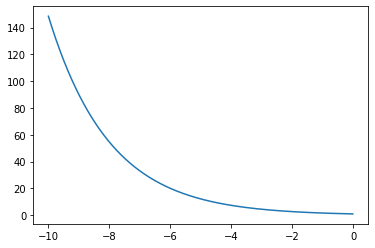

In [89]:
plt.plot(x, y)

In [57]:
from stage.utils.nn import truncated_normal
h = 100
b = 3
noise_iid = truncated_normal((b,h), torch.zeros(h), torch.ones(1))
noise = torch.zeros_like(noise_iid)
a = 0.7
noise[:, 0] = noise_iid[:, 0]
for t in range(1, h):
    noise[:, t] = a*noise_iid[:, t] + (1-a)*noise[:, t-1] 

In [60]:
mean = torch.ones(4)

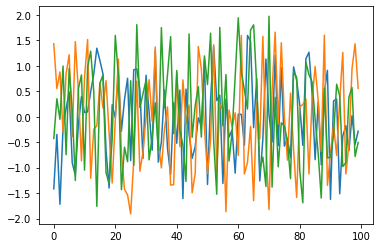

In [58]:
plt.plot(noise_iid.T.detach().cpu().numpy())

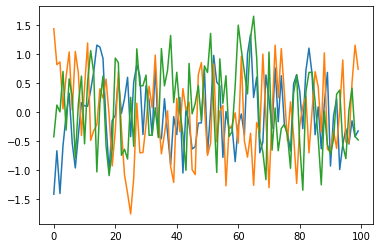

In [59]:
plt.plot(noise.T.detach().cpu().numpy())

In [8]:
# data_train = np.load(savepath+'data_pd_reg.npy')
# kuka = KukaPETS(render=True, 
#                 action_parameterization='pd')
# kuka.visualize_training_data(data_train, it_begin=0)
# q = kuka.env.step_cost.desired.detach().cpu().numpy()
# v = np.zeros(7)
# kuka.env.set_state(q, v)

In [9]:
# kuka.env.close()